In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [2]:
#add the database to start exploration

missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Child_mortality = pd.read_csv("Infant and Neonatal Mortality.csv", na_values = missing_value_formats,  dtype={'VALUE': float})

In [4]:
#Check Features and variables of the dataset
Child_mortality.head()

,Statistic Label,Year,Age Range,Principal Cause of Death,Area,UNIT,VALUE
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN


In [10]:
#Check data types
Child_mortality.dtypes


Statistic Label              object
Year                          int64
Age Range                    object
Principal Cause of Death     object
Area                         object
UNIT                         object
VALUE                       float64
dtype: object

This datase is composed of 4 different types
Object=Text in python (str)
Int64= Integer values
Float64=Decimal values 

## Data Structures

In [13]:
#Example of a List create to include all the posibles variables of missing values in this dataset
missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
type(missing_value_formats)

list

In [18]:
#Example of a Array to encode the variable "Area" and handle categorical data 
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le.fit_transform(Child_mortality ["Area"])

array([ 0,  5,  8, ...,  1,  4, 17])

Dictionary and tuples structures wast not required for this analysis. 

## List Slicing and Combining data

This slicing was required as the original dataframe Child_mortality was duplicating rows due the structore of the dataframe were the "UNIT" had 2 variables that shared all features but rate was added creating duplicated rows.

This was posible to observe by checking the shape of the data Child_mortality and the using the fuction nunique value and checking the "Unit" variable

In [19]:
#Separating the variable "Unit" in 2 diferent dataframe extracting by Number and Rate

Number = Child_mortality.loc[Child_mortality['UNIT']=='Number']
rate = Child_mortality.loc[Child_mortality['UNIT']=='Rate' ] 

In this analisys was used the Merge function to combine data however, 2 differents variations were used to combine the data. 

In [91]:
#First one using the "ON" preposition to use common features to combine the dataframes> Using the pd.merge function to combine the dataframes previously created "Number" and "rate" by using the "ON" condition was posible to select the common features in both dataframes "Year","Age Range","Principal Cause of Death", "Area"  as common and no create new columns.

Mortality_rate = pd.merge(Number, rate, on=["Year","Age Range","Principal Cause of Death", "Area", ])
Mortality_rate.shape

(33696, 10)

Another slicing was made to separte dataframes in numerical and catefgorical data to create a new dataframe with the encoding of the categorical data. 

In [94]:
Data_num = Mortality_rate[['Year','Number', 'Rate' ]]
Data_num

,Year,Number,Rate
0,1980,NaN,NaN
1,1980,5.0,0.24
2,1980,NaN,NaN
3,1980,1.0,0.71
4,1980,NaN,NaN
...,...,...,...
33691,2018,NaN,NaN
33692,2018,1.0,1.29
33693,2018,NaN,NaN
33694,2018,NaN,NaN


In [95]:
Mortality_rate_objects =Mortality_rate.select_dtypes(object)
print(Mortality_rate_objects)

               Age Range           Principal Cause of Death  \
0      Infant (0-1 year)  Infectious and parasitic diseases   
1      Infant (0-1 year)  Infectious and parasitic diseases   
2      Infant (0-1 year)  Infectious and parasitic diseases   
3      Infant (0-1 year)  Infectious and parasitic diseases   
4      Infant (0-1 year)  Infectious and parasitic diseases   
...                  ...                                ...   
33691  4 weeks to 1 year       Sudden infant death syndrome   
33692  4 weeks to 1 year       Sudden infant death syndrome   
33693  4 weeks to 1 year       Sudden infant death syndrome   
33694  4 weeks to 1 year       Sudden infant death syndrome   
33695  4 weeks to 1 year       Sudden infant death syndrome   

                         Area  
0                      Carlow  
1      Dublin City and County  
2                     Kildare  
3                    Kilkenny  
4                       Laois  
...                       ...  
33691              

In [96]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for col in Mortality_rate_objects:
    le =LabelEncoder()
    Mortality_rate_objects[col]=le.fit_transform(Mortality_rate_objects[col])

In [97]:
#Second one using the same Merge fuction but in this ocation we used the 
#left_index=True, right_index=True to indicate that the merge operation should be based on the indices of the two DataFrames  
#suffixes=("_l", "_r") to avoid posibles conflicts with duplicate Columns the suffixes "_l", "_r" are added to distinguish them in the new dataframe

Mortality_rate = pd.merge(Mortality_rate_objects, Data_num, left_index=True, right_index=True, suffixes=("_l", "_r"))
Mortality_rate.head()

,Age Range,Principal Cause of Death,Area,Year,Number,Rate
0,2,5,0,1980,NaN,NaN
1,2,5,5,1980,5.0,0.24
2,2,5,8,1980,NaN,NaN
3,2,5,9,1980,1.0,0.71
4,2,5,10,1980,NaN,NaN


In [92]:
#drop columns

Mortality_rate = Mortality_rate.drop(["Statistic Label_y", "UNIT_x", "UNIT_y","Statistic Label_x"], axis=1)

Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,VALUE_x,VALUE_y
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,NaN,NaN
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.24
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,NaN,NaN
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.71
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,NaN,NaN


In [93]:

Mortality_rate = Mortality_rate.rename(columns={"Statistic Label_x":"Statistic Label", "VALUE_x": "Number", "VALUE_y":"Rate" })
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,NaN,NaN
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.24
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,NaN,NaN
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.71
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,NaN,NaN


In [30]:
Child_mortality["UNIT"].nunique()

2

In [31]:
Child_mortality.shape

(67392, 7)

In [32]:
Number.shape

(33696, 7)

In [33]:
rate.shape

(33696, 7)

## Flow Control (If/Else statements), functions

Examples of if/else statement 

In [48]:
#To check the area with a rate >5 in the whole dataframe

for index, row in Mortality_rate.iterrows():
    if row['Rate'] > 9:
    
        print(f"Area: {row['Area']} has a Rate greater than 9.")

Area: Sligo has a Rate greater than 9.
Area: Longford has a Rate greater than 9.
Area: Sligo has a Rate greater than 9.
Area: Carlow has a Rate greater than 9.


In [59]:
#To check the areas of Ireland with a rate >5 for the year 2000 in the whole dataframe
#It's posible to look for 2 differents statements by using the "and" preposition, both statement have to be true to show a result.
for index, row in Mortality_rate.iterrows():
    if row['Year'] == 2000 and row['Rate'] > 5:
        print(f"Area: {row['Area']} had a Rate greater than 5 in 2000.")
        

Area: Carlow had a Rate greater than 5 in 2000.


In [60]:
#to look for 2 differents statements by using the "or" preposition, in this case if at least one of the statement is true it will show a result.
for index, row in Mortality_rate.iterrows():
    if row['Year'] == 2000 or row['Rate'] > 5:
        print(f"Area: {row['Area']} had a Rate greater than 5 in 2000.")

Area: Clare had a Rate greater than 5 in 2000.
Area: Cork had a Rate greater than 5 in 2000.
Area: Roscommon had a Rate greater than 5 in 2000.
Area: Sligo had a Rate greater than 5 in 2000.
Area: Cavan had a Rate greater than 5 in 2000.
Area: Donegal had a Rate greater than 5 in 2000.
Area: Laois had a Rate greater than 5 in 2000.
Area: Wexford had a Rate greater than 5 in 2000.
Area: Leitrim had a Rate greater than 5 in 2000.
Area: Mayo had a Rate greater than 5 in 2000.
Area: Roscommon had a Rate greater than 5 in 2000.
Area: Donegal had a Rate greater than 5 in 2000.
Area: Clare had a Rate greater than 5 in 2000.
Area: Roscommon had a Rate greater than 5 in 2000.
Area: Cavan had a Rate greater than 5 in 2000.
Area: Donegal had a Rate greater than 5 in 2000.
Area: Leitrim had a Rate greater than 5 in 2000.
Area: Longford had a Rate greater than 5 in 2000.
Area: Wexford had a Rate greater than 5 in 2000.
Area: Clare had a Rate greater than 5 in 2000.
Area: Carlow had a Rate greater t

Area: Dublin City and County had a Rate greater than 5 in 2000.
Area: Kildare had a Rate greater than 5 in 2000.
Area: Kilkenny had a Rate greater than 5 in 2000.
Area: Laois had a Rate greater than 5 in 2000.
Area: Longford had a Rate greater than 5 in 2000.
Area: Louth had a Rate greater than 5 in 2000.
Area: Meath had a Rate greater than 5 in 2000.
Area: Offaly had a Rate greater than 5 in 2000.
Area: Westmeath had a Rate greater than 5 in 2000.
Area: Wexford had a Rate greater than 5 in 2000.
Area: Wicklow had a Rate greater than 5 in 2000.
Area: Clare had a Rate greater than 5 in 2000.
Area: Cork had a Rate greater than 5 in 2000.
Area: Kerry had a Rate greater than 5 in 2000.
Area: Limerick had a Rate greater than 5 in 2000.
Area: North Tipperary had a Rate greater than 5 in 2000.
Area: South Tipperary had a Rate greater than 5 in 2000.
Area: Waterford had a Rate greater than 5 in 2000.
Area: Galway had a Rate greater than 5 in 2000.
Area: Leitrim had a Rate greater than 5 in 200

Area: Carlow had a Rate greater than 5 in 2000.
Area: Leitrim had a Rate greater than 5 in 2000.
Area: Leitrim had a Rate greater than 5 in 2000.
Area: North Tipperary had a Rate greater than 5 in 2000.
Area: Leitrim had a Rate greater than 5 in 2000.
Area: Westmeath had a Rate greater than 5 in 2000.
Area: Limerick had a Rate greater than 5 in 2000.
Area: Westmeath had a Rate greater than 5 in 2000.
Area: North Tipperary had a Rate greater than 5 in 2000.
Area: Roscommon had a Rate greater than 5 in 2000.


This for loop was create to check in each Columns of the dataframe Mortality_rate_object and transform all the categorical data into numerical values, this a step that will allow us to apply differents machines learning models. 

In [98]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for col in Mortality_rate_objects:
    le =LabelEncoder()
    Mortality_rate_objects[col]=le.fit_transform(Mortality_rate_objects[col])

In [99]:
Mortality_rate_objects.head(10)

,Age Range,Principal Cause of Death,Area
0,2,5,0
1,2,5,5
2,2,5,8
3,2,5,9
4,2,5,10
5,2,5,13
6,2,5,14
7,2,5,16
8,2,5,19
9,2,5,24


# Functions 

In [83]:
def top_3_areas_with_highest_rate(Mortality_rate):
    # Sort the DataFrame by the 'Rate' column in descending order and get the top 3 rows
    top_areas = Mortality_rate.sort_values(by='Rate', ascending=False).head(3)
    return top_areas

# Usage example:
top_3 = top_3_areas_with_highest_rate(Mortality_rate)
print(top_3)
top_3.head(10)

       Year          Age Range  \
17442  2000  Infant (0-1 year)   
16574  1999  Infant (0-1 year)   
15719  1998  Infant (0-1 year)   

                                Principal Cause of Death      Area  Number  \
17442  Congenital malformations and chromosomal abnor...    Carlow     7.0   
16574  Certain conditions originating in the perinata...     Sligo     7.0   
15719  Congenital malformations and chromosomal abnor...  Longford     4.0   

       Rate  
17442  9.92  
16574  9.76  
15719  9.43  


,Year,Age Range,Principal Cause of Death,Area,Number,Rate
17442,2000,Infant (0-1 year),Congenital malformations and chromosomal abnor...,Carlow,7.0,9.92
16574,1999,Infant (0-1 year),Certain conditions originating in the perinata...,Sligo,7.0,9.76
15719,1998,Infant (0-1 year),Congenital malformations and chromosomal abnor...,Longford,4.0,9.43


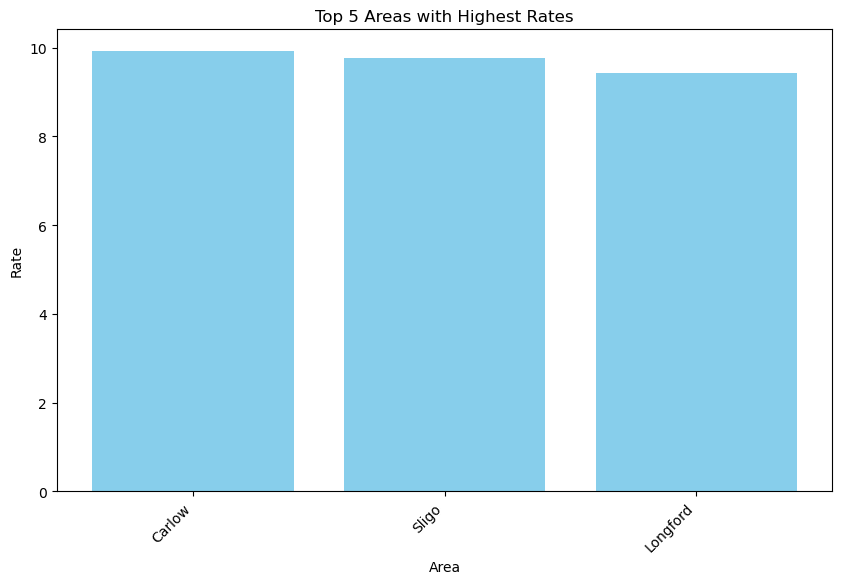

In [87]:
 def top_3_areas_with_highest_rate(Mortality_rate):
    # Sort the DataFrame by the 'Rate' column in descending order and get the top 3 rows
    top_areas = Mortality_rate.sort_values(by='Rate', ascending=False).head(3)
    return top_areas
    
    # Create a bar plot for the top 5 areas
    plt.figure(figsize=(10, 6))
    plt.bar(top_areas ['Area'], top_areas['Rate'], color='skyblue')
    plt.xlabel('Area')
    plt.ylabel('Rate')
    plt.title('Top 5 Areas with Highest Rates')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.show()

# Usage example:
plot_top_5_areas_with_highest_rate(Mortality_rate)

In [85]:
def find_higher_year_and_rate(Mortality_rate):
    # Find the row with the highest rate
    highest_rate_row = Mortality_rate[Mortality_rate['Rate'] == Mortality_rate['Rate'].max()]
    
    # Extract the year and rate from the highest rate row
    trend_year = highest_rate_row['Year'].values[0]
    trend_rate = highest_rate_row['Rate'].values[0]
    
    return trend_year, trend_rate

trend_year, trend_rate = find_trend_year_and_rate(Mortality_rate)
print(f"The year with the highest rate is {trend_year} with a rate of {trend_rate}")


The year with the highest rate is 2000 with a rate of 9.92


Class were not created for this analysis

In [90]:
Mortality_rate = pd.merge(Number, rate, on=["Year","Age Range","Principal Cause of Death", "Area", ])
Mortality_rate.head()

,Statistic Label_x,Year,Age Range,Principal Cause of Death,Area,UNIT_x,VALUE_x,Statistic Label_y,UNIT_y,VALUE_y
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0,"Deaths per 1,000 Live Births",Rate,0.24
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0,"Deaths per 1,000 Live Births",Rate,0.71
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
